In [135]:
#!pip install bqplot
#!pip install ipywidgets
#!pip install ipympl
#!jupyter labextension install @jupyter-widgets/jupyterlab-manager
#!jupyter nbextension install --user --py widgetsnbextension
#!jupyter nbextension enable --user --py widgetsnbextension
#!pip install plotly
#!pip install cufflinks


In [136]:
import operator
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import ipywidgets as widgets
import plotly.express as px
import plotly.graph_objects as go
import bqplot
from bqplot import Pie
from collections import Counter
from bqplot import DateScale, LinearScale, Lines, Axis, Figure
from bqplot import Tooltip
import cufflinks as cf
from matplotlib.patches import ConnectionPatch
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt

from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
pd.set_option('display.max_columns', 50)
%matplotlib widget


In [137]:
# Squad
# MI:
MI_batsmen = ['RG Sharma', 'Q de Kock', 'SA Yadav', 'Ishan Kishan', 'HH Pandya', 'KH Pandya', 'KA Pollard']
MI_bowlers = ['JJ Bumrah', 'TA Boult', 'NM Coulter-Nile', 'RD Chahar', 'KH Pandya', 'KA Pollard']
#J Pattinson data not available

# CSK
CSK_batsmen = ['S Curran', 'SR Watson', 'F du Plessis', 'AT Rayudu', 'MS Dhoni', 'RA Jadeja']
CSK_bowlers = ['DL Chahar', 'S Curran','SN Thakur',  'KV Sharma', 'PP Chawla', 'RA Jadeja']
# Bravo will not play today
# Josh Hazlewood is a new player, hence no data available



In [138]:
matches = pd.read_csv("matches.csv")
deliveries =  pd.read_csv("deliveries.csv")
IPL_data = pd.merge(deliveries, matches[['id','season', 'team1', 'team2', 'toss_winner', 'toss_decision','winner','result', 'dl_applied','win_by_runs','win_by_wickets', 'venue' ]], 
                    left_on='match_id', right_on='id')

# Question 2: How many runs will Quinton De Kock score off boundaries in the first 10 balls he faces? <br>If he doesn't face 10 balls and gets out before, then the number of runs he scored off boundaries until the point he got out will be considered

## 2.1 

In [165]:
q_data = deliveries[deliveries.batsman == 'Q de Kock']
qdk1 = q_data[["match_id", "batsman", "ball", "batsman_runs"]].groupby(['match_id'])['ball'].count().reset_index()

# less than 10 balls played
list1 = qdk1[qdk1.ball <10].match_id.values
qdk_L = q_data[q_data.match_id.isin(list1)]
m_id =[]
no_of_boundaries = []
no_of_sixes = []
for i in qdk_L.match_id.unique():
    q = qdk_L[qdk_L.match_id == i].reset_index()
    m_id.append(q.match_id.unique()[0])
    no_of_boundaries.append(len(q[q.batsman_runs == 4])) # record the number of boundaries 
    no_of_sixes.append(len(q[q.batsman_runs == 6]))

# Create a dataframe
qdk_data1 = pd.DataFrame(list(zip(m_id, no_of_boundaries, no_of_sixes)), 
               columns =['match_id', 'no_of_boundaries', 'no_of_sixes'])


################################################################################################################################
# greater than 10 balls
m_id =[]
no_of_boundaries = []
no_of_sixes =[]
list2 = qdk1[qdk1.ball >= 10].match_id.values
qdk_G = q_data[q_data.match_id.isin(list2)]
for i in qdk_G.match_id.unique():
    q1 = qdk_G[qdk_G.match_id == i].reset_index()
    t1 = q1[q1.index <10]
    m_id.append(t1.match_id.unique()[0])
    no_of_boundaries.append(len(t1[t1.batsman_runs == 4])) # record the number of boundaries 
    no_of_sixes.append(len(t1[t1.batsman_runs == 6]))

#print(m_id, no_of_boundaries) 
# Create a dataframe
qdk_data2 = pd.DataFrame(list(zip(m_id, no_of_boundaries, no_of_sixes)), 
               columns =['match_id', 'no_of_boundaries', 'no_of_sixes'])


f = [qdk_data1, qdk_data2]
qdk_data = pd.concat(f)
qdk_data["runs_scored"] = qdk_data.no_of_boundaries*4 + qdk_data.no_of_sixes*6
qdk_data["index"] = qdk_data.index


import numpy as np
import cufflinks as cf

#print("List of Cufflinks Themes : ", cf.getThemes())
cf.set_config_file(theme='pearl',sharing='public',offline=True)
qdk_data.iplot(kind="bar",x = "index",
                subplots=True,
                sortbars=True,
                keys = ["no_of_boundaries","no_of_sixes","runs_scored"],
                title="Figure 1 : Number of runs scored by Q de Kock in 1st 10 balls in every matches he played",
                theme="henanigans")

## Note: Adding this image if in case the widget doesn't work
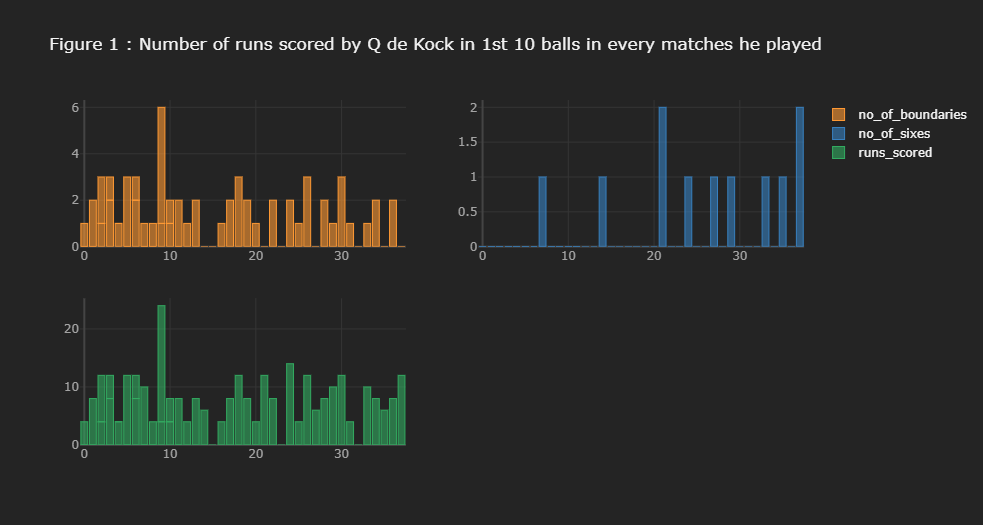

In [169]:
print("Minimum runs scored by Q de Kock in 1st 10 balls off the boundaries are: ",qdk_data.runs_scored.min())
print("Maximum runs scored by Q de Kock in 1st 10 balls off the boundaries are: ",qdk_data.runs_scored.max())
print("Average runs scored by Q de Kock in 1st 10 balls off the boundaries are: ",qdk_data.runs_scored.mean())
print("runs scored by Q de Kock in 1st 10 balls off the boundaries frequently are: ",qdk_data.runs_scored.mode())

Minimum runs scored by Q de Kock in 1st 10 balls off the boundaries are:  0
Maximum runs scored by Q de Kock in 1st 10 balls off the boundaries are:  20
Average runs scored by Q de Kock in 1st 10 balls off the boundaries are:  6.12
runs scored by Q de Kock in 1st 10 balls off the boundaries frequently are:  0    4
dtype: int64


## 2.2 Against the CSK bowlers

In [170]:
q_data_ = deliveries[(deliveries.batsman == 'Q de Kock') & (deliveries.bowler.isin(CSK_bowlers))]
qdk1_ = q_data_[["match_id", "batsman", "bowler","ball", "batsman_runs"]].groupby(['match_id'])['ball'].count().reset_index()

# less than 10 balls played
list1_ = qdk1_[qdk1_.ball <10].match_id.values
qdk_L_ = q_data_[q_data_.match_id.isin(list1_)]
m_id =[]
no_of_boundaries = []
no_of_sixes = []
for i in qdk_L_.match_id.unique():
    q_ = qdk_L_[qdk_L_.match_id == i].reset_index()
    m_id.append(q_.match_id.unique()[0])
    no_of_boundaries.append(len(q_[q_.batsman_runs == 4])) # record the number of boundaries 
    no_of_sixes.append(len(q_[q_.batsman_runs == 6])) # record the number of sixes

# Create a dataframe
qdk_data1_ = pd.DataFrame(list(zip(m_id, no_of_boundaries, no_of_sixes)), 
               columns =['match_id', 'no_of_boundaries', 'no_of_sixes'])


################################################################################################################################
# greater than 10 balls
m_id =[]
no_of_boundaries = []
no_of_sixes =[]
list2_ = qdk1_[qdk1_.ball >= 10].match_id.values
qdk_G_ = q_data_[q_data_.match_id.isin(list2_)]
for i in qdk_G_.match_id.unique():
    q1_ = qdk_G_[qdk_G_.match_id == i].reset_index()
    t1_ = q1_[q1_.index <10]
    m_id.append(t1_.match_id.unique()[0])
    no_of_boundaries.append(len(t1_[t1_.batsman_runs == 4])) # record the number of boundaries 
    no_of_sixes.append(len(t1_[t1_.batsman_runs == 6])) # record the number of sixes

#print(m_id, no_of_boundaries) 
# Create a dataframe
qdk_data2_ = pd.DataFrame(list(zip(m_id, no_of_boundaries, no_of_sixes)), 
               columns =['match_id', 'no_of_boundaries', 'no_of_sixes'])


f_ = [qdk_data1_, qdk_data2_]
qdk_data_ = pd.concat(f_)
qdk_data_["runs_scored"] = qdk_data_.no_of_boundaries*4 + qdk_data_.no_of_sixes*6
qdk_data_["index"] = qdk_data_.index


import numpy as np
import cufflinks as cf

#print("List of Cufflinks Themes : ", cf.getThemes())
cf.set_config_file(theme='pearl',sharing='public',offline=True)
qdk_data_.iplot(kind="bar",x = "index",
                subplots=True,
                sortbars=True,
                keys = ["no_of_boundaries","no_of_sixes","runs_scored"],
                title="Figure 2 : Number of runs scored by Q de Kock in 1st 10 balls in a matches he played against CSK bowlers",
                theme="henanigans")

## Note: Adding this image if in case the widget doesn't work
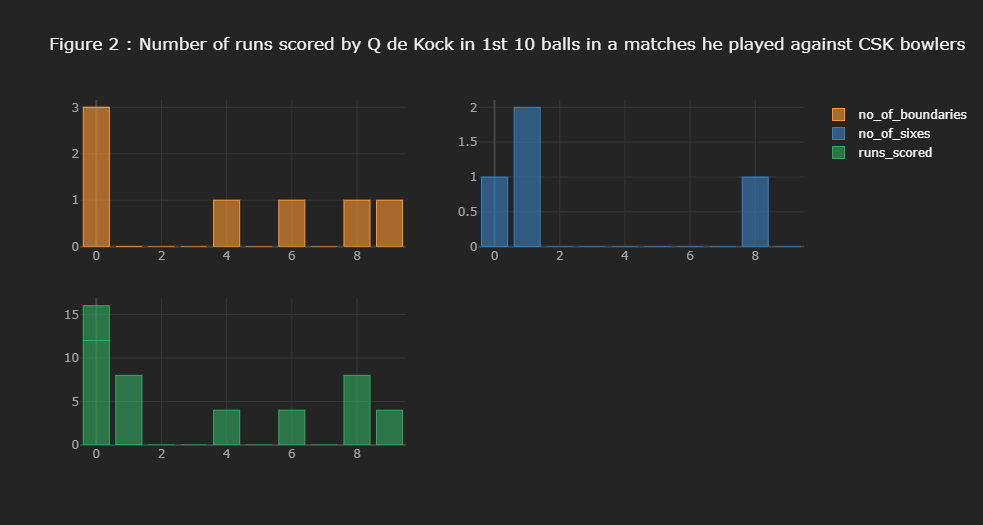


In [171]:
print("Minimum runs scored by Q de Kock in 1st 10 balls off the boundaries against CSK bowlers are: ",qdk_data_.runs_scored.min())
print("Maximum runs scored by Q de Kock in 1st 10 balls off the boundaries against CSK bowlers are: ",qdk_data_.runs_scored.max())
print("Average runs scored by Q de Kock in 1st 10 balls off the boundaries against CSK bowlers are: ",qdk_data_.runs_scored.mean())
print("runs scored by Q de Kock in 1st 10 balls off the boundaries frequently against CSK bowlers are: ",qdk_data_.runs_scored.mode())

Minimum runs scored by Q de Kock in 1st 10 balls off the boundaries against CSK bowlers are:  0
Maximum runs scored by Q de Kock in 1st 10 balls off the boundaries against CSK bowlers are:  12
Average runs scored by Q de Kock in 1st 10 balls off the boundaries against CSK bowlers are:  4.333333333333333
runs scored by Q de Kock in 1st 10 balls off the boundaries frequently against CSK bowlers are:  0    0
dtype: int64


## 2.3 Powerplay overs against CSK bowlers
for overall IPL data in powerplay overs results were same as in 2.1

In [172]:
q_d = deliveries[(deliveries.batsman == 'Q de Kock') & (deliveries.over <= 6) & (deliveries.bowler.isin(CSK_bowlers))]
qd1 = q_d[["match_id", "batsman", "ball", "batsman_runs"]].groupby(['match_id'])['ball'].count().reset_index()

# less than 10 balls played
l1 = qd1[qd1.ball <10].match_id.values
qd_L = q_d[q_d.match_id.isin(l1)]

m_id =[]
no_of_boundaries = []
no_of_sixes = []
for i in qd_L.match_id.unique():
    qd = qd_L[qd_L.match_id == i].reset_index()
    m_id.append(qd.match_id.unique()[0])
    no_of_boundaries.append(len(qd[qd.batsman_runs == 4])) # record the number of boundaries 
    no_of_sixes.append(len(qd[qd.batsman_runs == 6])) # record the number of sixes

# Create a dataframe
q_data1 = pd.DataFrame(list(zip(m_id, no_of_boundaries, no_of_sixes)), 
               columns =['match_id', 'no_of_boundaries', 'no_of_sixes'])

###############################################################################################################################
# greater than 10 balls
m_id =[]
no_of_boundaries = []
no_of_sixes = []
l2 = qd1[qd1.ball >= 10].match_id.values
qd_G = q_d[q_d.match_id.isin(l2)]
for i in qd_G.match_id.unique():
    qd1 = qd_G[qd_G.match_id == i].reset_index()
    td1 = qd1[qd1.index <10]
    m_id.append(td1.match_id.unique()[0])
    no_of_boundaries.append(len(td1[td1.batsman_runs == 4])) # record the number of boundaries 
    no_of_sixes.append(len(td1[td1.batsman_runs == 6])) # record the number of sixes

#print(m_id, no_of_boundaries) 
# Create a dataframe
q_data2 = pd.DataFrame(list(zip(m_id, no_of_boundaries, no_of_sixes)), 
               columns =['match_id', 'no_of_boundaries', 'no_of_sixes'])


fd = [q_data1, q_data2]
q_data = pd.concat(fd)
q_data["runs_scored"] = q_data.no_of_boundaries*4 + q_data.no_of_sixes*6
q_data["index"] = q_data.index
import numpy as np
import cufflinks as cf

#print("List of Cufflinks Themes : ", cf.getThemes())
cf.set_config_file(theme='solar',sharing='public',offline=True)
q_data.iplot(kind="bar",x = "index",
                subplots=True,
                sortbars=True,
                keys = ["no_of_boundaries","no_of_sixes","runs_scored"],
                title="Figure 3 : Number of runs scored by Q de Kock in 1st 10 balls in Poweplay overs against CSK bowlers (Matchwise) ",
                theme="polar")

## Note: adding this image, if in case widget doesn't work
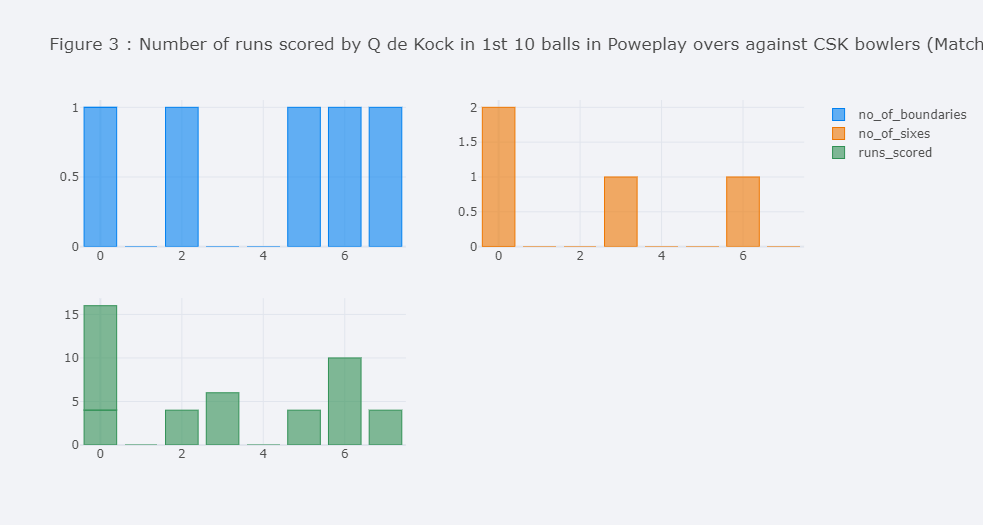

In [173]:
print("Minimum runs scored by Q de Kock in 1st 10 balls off the boundaries in powerplay (Against CSK bowlers) : ",q_data.runs_scored.min())
print("Maximum runs scored by Q de Kock in 1st 10 balls off the boundaries in powerplay (Against CSK bowlers) : ",q_data.runs_scored.max())
print("Average runs scored by Q de Kock in 1st 10 balls off the boundaries in powerplay (Against CSK bowlers): ",q_data.runs_scored.mean())
print("runs scored by Q de Kock in 1st 10 balls off the boundaries frequently in powerplay (Against CSK bowlers): ",q_data.runs_scored.mode())

Minimum runs scored by Q de Kock in 1st 10 balls off the boundaries in powerplay (Against CSK bowlers) :  0
Maximum runs scored by Q de Kock in 1st 10 balls off the boundaries in powerplay (Against CSK bowlers) :  12
Average runs scored by Q de Kock in 1st 10 balls off the boundaries in powerplay (Against CSK bowlers):  4.888888888888889
runs scored by Q de Kock in 1st 10 balls off the boundaries frequently in powerplay (Against CSK bowlers):  0    4
dtype: int64


## Conclusion: Q de Kock will score 0-10 runs off the boundaries in the 1st 10 balls he playes

# Question 3: Which MI bowler will have the best dot balls to total balls bowled ratio?

## 3.1 Overall performance 

In [145]:
mi = deliveries[deliveries.bowler.isin(MI_bowlers)]
mi_bowler = mi[["match_id","bowler","batsman_runs"]].groupby(['match_id','bowler'])['batsman_runs'].count().reset_index(name = "balls_bowled")
m_id = []
total_balls = []
dot_balls = []
bowler = []
for i in mi.match_id.unique():
    for j in mi[["match_id","bowler","batsman_runs"]][(mi.match_id ==i)].bowler.unique():
        bowler.append(j)
        x = len(mi[["match_id","bowler","batsman_runs"]][(mi.match_id ==i) & (mi.bowler == j)][mi.batsman_runs ==0])
        y = len(mi[["match_id","bowler","batsman_runs"]][(mi.match_id ==i) & (mi.bowler == j)])
        dot_balls.append(x)
        total_balls.append(y)
        m_id.append(i)
        
mi_bowlers_data = pd.DataFrame(list(zip(m_id, bowler, total_balls, dot_balls)), 
               columns =['match_id', 'bowler', 'balls_bowled', 'dot_balls'])

mi_bowlers_data["dtob_ratio"] = mi_bowlers_data.dot_balls/mi_bowlers_data.balls_bowled
#mi_bowlers_data
bowler = []
dtob = []
for count , i in enumerate(mi_bowlers_data.bowler.unique(), 4):
    tle="Figure " + str(count) + " : Dotballs to total balls data for " + i
    print(i)
    mib = mi_bowlers_data[["match_id", "balls_bowled", "dot_balls", "dtob_ratio"]][mi_bowlers_data.bowler == i].reset_index()
    mib["index"] = mib.index
    print(mib)
    print("dotballs to balls bowled ratio overall : ", mib.dot_balls.sum()/mib.balls_bowled.sum())
    print("Best dotballs to balls bowled ratio overall : ", mib.dtob_ratio.min())
    print("Worst dotballs to balls bowled ratio overall : ", mib.dtob_ratio.max())
    print("Average dotballs to balls bowled ratio overall : ", mib.dtob_ratio.mean())
    dtob.append(mib.dot_balls.sum()/mib.balls_bowled.sum())
    bowler.append(i)
    print("###############################################################################################")
    cf.set_config_file(theme='solar',sharing='public',offline=True)
    mib.iplot(kind="bar",x = "index",
                subplots=True,
                sortbars=True,
                keys = ["balls_bowled", "dot_balls","dtob_ratio"],
                title=tle,
                theme="polar")
    
    
mi_dtob = pd.DataFrame(list(zip(bowler,dtob)),columns =['bowler ', 'dtob_ratio'])
mi_dtob

JJ Bumrah
    index  match_id  balls_bowled  dot_balls  dtob_ratio
0       0         2            24          6    0.250000
1       1         7            26          7    0.269231
2       2        10            24          9    0.375000
3       3        12            25          6    0.240000
4       4        16            25          5    0.200000
..    ...       ...           ...        ...         ...
72     72     11338            27          5    0.185185
73     73     11342            26          9    0.346154
74     74     11347            25         12    0.480000
75     75     11412            25          6    0.240000
76     76     11415            24         11    0.458333

[77 rows x 5 columns]
dotballs to balls bowled ratio overall :  0.39154616240266965
Best dotballs to balls bowled ratio overall :  0.15384615384615385
Worst dotballs to balls bowled ratio overall :  0.7777777777777778
Average dotballs to balls bowled ratio overall :  0.39452971731823594
#################

KH Pandya
    index  match_id  balls_bowled  dot_balls  dtob_ratio
0       0         2            12          2    0.166667
1       1         7            24          8    0.333333
2       2        10             8          1    0.125000
3       3        12            24          9    0.375000
4       4        16            18          4    0.222222
5       5        22            26          8    0.307692
6       6        24             6          1    0.166667
7       7        34            25         17    0.680000
8       8        37            25          8    0.320000
9       9        53            12          2    0.166667
10     10        56            24          9    0.375000
11     11        58            18          5    0.277778
12     12        59            24          8    0.333333
13     13       585            24          9    0.375000
14     14       590            28         12    0.428571
15     15       593            25          4    0.160000
16     16       597  

KA Pollard
    index  match_id  balls_bowled  dot_balls  dtob_ratio
0       0         2            12          1    0.083333
1       1       183            25         12    0.480000
2       2       188            12          2    0.166667
3       3       199            12          3    0.250000
4       4       201            14          2    0.142857
..    ...       ...           ...        ...         ...
76     76       573            18          2    0.111111
77     77       593             6          1    0.166667
78     78       597            12          0    0.000000
79     79       613            13          3    0.230769
80     80       617             6          2    0.333333

[81 rows x 5 columns]
dotballs to balls bowled ratio overall :  0.3268025078369906
Best dotballs to balls bowled ratio overall :  0.0
Worst dotballs to balls bowled ratio overall :  0.7142857142857143
Average dotballs to balls bowled ratio overall :  0.30947516385138224
#################################

TA Boult
    index  match_id  balls_bowled  dot_balls  dtob_ratio
0       0         3            25         10    0.400000
1       1         7            24          9    0.375000
2       2        11            24         10    0.416667
3       3        14            24         10    0.416667
4       4        53            26         15    0.576923
5       5        57            25          9    0.360000
6       6       521            25         13    0.520000
7       7       525            29         20    0.689655
8       8       529            26         13    0.500000
9       9       541            26         10    0.384615
10     10       544            26         16    0.615385
11     11       551            24          6    0.250000
12     12       564            25          9    0.360000
13     13       635            26         13    0.500000
14     14      7895            24         11    0.458333
15     15      7899            18          9    0.500000
16     16      7902   

RD Chahar
    index  match_id  balls_bowled  dot_balls  dtob_ratio
0       0         4            28         13    0.464286
1       1        13            18          8    0.444444
2       2     11151            13          5    0.384615
3       3     11310            25         12    0.480000
4       4     11315            24         12    0.500000
5       5     11318            24          6    0.250000
6       6     11322            24          9    0.375000
7       7     11325            26         15    0.576923
8       8     11327            24         10    0.416667
9       9     11335            24          7    0.291667
10     10     11338            25          7    0.280000
11     11     11342            24         10    0.416667
12     12     11347             6          4    0.666667
13     13     11412            24         13    0.541667
14     14     11415            24         13    0.541667
dotballs to balls bowled ratio overall :  0.43243243243243246
Best dotballs to

NM Coulter-Nile
    index  match_id  balls_bowled  dot_balls  dtob_ratio
0       0        18            25         13    0.520000
1       1        23            21          7    0.333333
2       2        27            21         15    0.714286
3       3        31            24         11    0.458333
4       4        36            25          8    0.320000
5       5        40            20         10    0.500000
6       6        57            24         12    0.500000
7       7        58            18          6    0.333333
8       8       450            25         12    0.480000
9       9       463            26         13    0.500000
10     10       519            25         15    0.600000
11     11       523            25         10    0.400000
12     12       528            19         14    0.736842
13     13       531            24         10    0.416667
14     14       535            25         11    0.440000
15     15       539            27         15    0.555556
16     16      

,bowler,dtob_ratio
0,JJ Bumrah,0.391546
1,KH Pandya,0.328512
2,KA Pollard,0.326803
3,TA Boult,0.396509
4,RD Chahar,0.432432
5,NM Coulter-Nile,0.479522


## 3.2 Against CSK batsmen

In [348]:
mi_ = deliveries[(deliveries.bowler.isin(MI_bowlers)) & (deliveries.batsman.isin(CSK_batsmen))]
mi_bowler_ = mi_[["match_id","bowler","batsman_runs"]].groupby(['match_id','bowler'])['batsman_runs'].count().reset_index(name = "balls_bowled")
m_id = []
total_balls = []
dot_balls = []
bowler = []
for i in mi_.match_id.unique():
    for j in mi_[["match_id","bowler","batsman_runs"]][(mi_.match_id ==i)].bowler.unique():
        bowler.append(j)
        x_ = len(mi_[["match_id","bowler","batsman_runs"]][(mi_.match_id ==i) & (mi_.bowler == j)][mi_.batsman_runs ==0])
        y_ = len(mi_[["match_id","bowler","batsman_runs"]][(mi_.match_id ==i) & (mi_.bowler == j)])
        dot_balls.append(x_)
        total_balls.append(y_)
        m_id.append(i)
        
mi_bowlers_data_ = pd.DataFrame(list(zip(m_id, bowler, total_balls, dot_balls)), 
               columns =['match_id', 'bowler', 'balls_bowled', 'dot_balls'])

mi_bowlers_data_["dtob_ratio"] = mi_bowlers_data_.dot_balls/mi_bowlers_data_.balls_bowled
#mi_bowlers_data
bowler = []
dtob = []
for count , i in enumerate(mi_bowlers_data_.bowler.unique(), 10):
    tle_="Figure " + str(count) + " : Dotballs to total balls data for " + i + " Against CSK batsmen"
    print(i)
    mib_ = mi_bowlers_data_[["match_id", "balls_bowled", "dot_balls", "dtob_ratio"]][mi_bowlers_data_.bowler == i].reset_index()
    mib_["index"] = mib_.index
    print(mib_)
    print("dotballs to balls bowled ratio against CSK batsmen : ", mib_.dot_balls.sum()/mib_.balls_bowled.sum())
    print("Best dotballs to balls bowled ratio against CSK batsmen : ", mib_.dtob_ratio.min())
    print("Worst dotballs to balls bowled ratio against CSK batsmen : ", mib_.dtob_ratio.max())
    print("Average dotballs to balls bowled ratio against CSK batsmen : ", mib_.dtob_ratio.mean())
    dtob.append(mib_.dot_balls.sum()/mib_.balls_bowled.sum())
    bowler.append(i)
    print("###############################################################################################")
    cf.set_config_file(theme='solar',sharing='public',offline=True)
    mib_.iplot(kind="bar",x = "index",
                subplots=True,
                sortbars=True,
                keys = ["balls_bowled", "dot_balls","dtob_ratio"],
                title=tle_,
                theme="polar")
    
    
mi_dtob_ = pd.DataFrame(list(zip(bowler,dtob)),columns =['bowler ', 'dtob_ratio'])


JJ Bumrah
    index  match_id  balls_bowled  dot_balls  dtob_ratio
0       0         2             6          2    0.333333
1       1        28             3          1    0.333333
2       2        34             5          2    0.400000
3       3        37             3          2    0.666667
4       4        56            10          4    0.400000
5       5        59             1          1    1.000000
6       6       490             8          2    0.250000
7       7       513            10          9    0.900000
8       8       515             1          0    0.000000
9       9       577            12          7    0.583333
10     10       590             1          1    1.000000
11     11       605             4          1    0.250000
12     12       617             2          1    0.500000
13     13       630             5          2    0.400000
14     14      7894             8          3    0.375000
15     15      7920            13          8    0.615385
16     16     11151  

KA Pollard
    index  match_id  balls_bowled  dot_balls  dtob_ratio
0       0         2             2          0    0.000000
1       1       211             8          1    0.125000
2       2       234             4          0    0.000000
3       3       247             1          1    1.000000
4       4       257             2          2    1.000000
5       5       267             3          2    0.666667
6       6       299             2          0    0.000000
7       7       308             4          1    0.250000
8       8       377             6          3    0.500000
9       9       379             2          0    0.000000
10     10       386            13          4    0.307692
11     11       403             1          1    1.000000
12     12       457            18          9    0.500000
13     13       470             3          0    0.000000
14     14       490             7          3    0.428571
15     15       501             4          2    0.500000
16     16       530 

NM Coulter-Nile
   index  match_id  balls_bowled  dot_balls  dtob_ratio
0      0        23             2          0    0.000000
1      1        58             2          0    0.000000
2      2       519             9          6    0.666667
3      3       539             4          1    0.250000
4      4       553             6          3    0.500000
5      5       556             6          3    0.500000
dotballs to balls bowled ratio against CSK batsmen :  0.4482758620689655
Best dotballs to balls bowled ratio against CSK batsmen :  0.0
Worst dotballs to balls bowled ratio against CSK batsmen :  0.6666666666666666
Average dotballs to balls bowled ratio against CSK batsmen :  0.3194444444444444
###############################################################################################


KH Pandya
    index  match_id  balls_bowled  dot_balls  dtob_ratio
0       0        34             7          5    0.714286
1       1        37             2          0    0.000000
2       2        56             3          1    0.333333
3       3        59             6          2    0.333333
4       4       590             6          4    0.666667
5       5       617             7          5    0.714286
6       6      7920            12          5    0.416667
7       7     11151             4          0    0.000000
8       8     11335             3          3    1.000000
9       9     11412            17         10    0.588235
10     10     11415            17          8    0.470588
dotballs to balls bowled ratio against CSK batsmen :  0.5119047619047619
Best dotballs to balls bowled ratio against CSK batsmen :  0.0
Worst dotballs to balls bowled ratio against CSK batsmen :  1.0
Average dotballs to balls bowled ratio against CSK batsmen :  0.47612681436210846
########################

TA Boult
   index  match_id  balls_bowled  dot_balls  dtob_ratio
0      0        53             4          1    0.250000
1      1       521             9          6    0.666667
2      2       541             2          0    0.000000
3      3       551            10          0    0.000000
4      4       635             4          1    0.250000
5      5      7923            24          9    0.375000
6      6      7945            21          9    0.428571
7      7     11341            25         11    0.440000
8      8     11414            23         11    0.478261
dotballs to balls bowled ratio against CSK batsmen :  0.39344262295081966
Best dotballs to balls bowled ratio against CSK batsmen :  0.0
Worst dotballs to balls bowled ratio against CSK batsmen :  0.6666666666666666
Average dotballs to balls bowled ratio against CSK batsmen :  0.32094432942259027
###############################################################################################


RD Chahar
   index  match_id  balls_bowled  dot_balls  dtob_ratio
0      0     11151             5          2    0.400000
1      1     11412            17          9    0.529412
2      2     11415            15          8    0.533333
dotballs to balls bowled ratio against CSK batsmen :  0.5135135135135135
Best dotballs to balls bowled ratio against CSK batsmen :  0.4
Worst dotballs to balls bowled ratio against CSK batsmen :  0.5333333333333333
Average dotballs to balls bowled ratio against CSK batsmen :  0.4875816993464053
###############################################################################################


In [152]:
print("dtob ratio of MI bowlers overall : \n", mi_dtob.sort_values(by=['dtob_ratio'], ascending=True))

dtob ratio of MI bowlers overall : 
            bowler   dtob_ratio
2       KA Pollard    0.326803
1        KH Pandya    0.328512
0        JJ Bumrah    0.391546
3         TA Boult    0.396509
4        RD Chahar    0.432432
5  NM Coulter-Nile    0.479522


In [153]:
print("dtob ratio of MI bowlers against CSK batsmen : \n", mi_dtob_.sort_values(by=['dtob_ratio'], ascending=True))

dtob ratio of MI bowlers against CSK batsmen : 
            bowler   dtob_ratio
1       KA Pollard    0.340659
4         TA Boult    0.393443
0        JJ Bumrah    0.447761
2  NM Coulter-Nile    0.448276
3        KH Pandya    0.511905
5        RD Chahar    0.513514


## Conclusion: Best Dot ball to Total balls ratio will be of : J Bumrah
Above data shows best DTOB ratio for Pollard , Pandya nad TA boult but when we compare number of matches played by all the bowlers, it seems Bumrah leads in both Number of matches played and giving best dot to total balls ratio.


# Question 4: How many such overs will be there in a match where a 6 and 4 are scored in the same over?

## 4.1 

In [333]:
overs = IPL_data[(IPL_data.batsman.isin(MI_batsmen)) | (IPL_data.batsman.isin(CSK_batsmen))]
overs_4_6 = overs[["match_id", "batsman", "over", "batsman_runs", "venue"]][(overs.batsman_runs == 4) | (overs.batsman_runs == 6)]

# matches with 6
sixes = overs_4_6[overs_4_6.batsman_runs == 6]


# matches with 6
fours = overs_4_6[overs_4_6.batsman_runs == 4]

match_4_6 = []
no_of_overs = []
for i in sixes.match_id.unique():
    li1 =[]
    li2 = []
    diff = []
    if not(fours['match_id'].loc[fours['match_id'] == i].empty):
        for l in sixes[sixes.match_id == i].over.values:
            li1.append(l)
        for k in fours[fours.match_id == i].over.values:
            li2.append(k)
        
        li_dif = list(list(set(li1)-set(li2)) + list(set(li2)-set(li1)))
        diff.append(li_dif)
        n = len(li1) + len(li2)
        #print(i, li1, li2,n - len(li_dif))
        match_4_6.append(i)
        
        no_of_overs.append(n - len(li_dif))
 
over_4_and_6  = pd.DataFrame(list(zip(match_4_6,no_of_overs)),columns =['match_id', 'no_of_overs'])
over_4_and_6["index"] = over_4_and_6.index
cf.set_config_file(theme='solar',sharing='public',offline=True)
over_4_and_6.iplot(kind="bar",x = "index",
                subplots=True,
                sortbars=True,
                keys = ["no_of_overs"],
                title= "Figure 16 : Number of overs (inning1 and innin2 combined) where 4 and 6 scored by MI and CSK batsmen",
                theme="polar")

In [334]:
print("Average number of overs where 6 and 4 scored in a same match", over_4_and_6.no_of_overs.mean())

Average number of overs where 6 and 4 scored in a same match 4.5606936416184976


# 4.2 : Venue wise

In [338]:
over_4_and_6_venue = pd.merge(over_4_and_6, matches[['id', 'venue' ]], 
                    left_on='match_id', right_on='id')
over_4_and_6_venue[over_4_and_6_venue.venue == 'Sharjah Cricket Stadium']

,match_id,no_of_overs,index,id,venue
185,464,5,185,464,Sharjah Cricket Stadium
188,468,0,188,468,Sharjah Cricket Stadium
193,473,3,193,473,Sharjah Cricket Stadium


## 4.3  CSK  VS MI head to head (Playerwise)

In [339]:
overs_ = IPL_data[((IPL_data.batsman.isin(MI_batsmen)) & (IPL_data.bowler.isin(CSK_bowlers))) | ((IPL_data.bowler.isin(MI_bowlers)) & (IPL_data.batsman.isin(CSK_batsmen)))]
overs_4_6_ = overs_[["match_id", "batsman", "over", "batsman_runs", "venue"]][(overs_.batsman_runs == 4) | (overs_.batsman_runs == 6)]

# matches with 6
sixes_ = overs_4_6_[overs_4_6_.batsman_runs == 6]


# matches with 6
fours_ = overs_4_6_[overs_4_6_.batsman_runs == 4]

match_4_6_ = []
no_of_overs_ = []
for i in sixes_.match_id.unique():
    li1_ =[]
    li2_ = []
    diff_ = []
    if not(fours_['match_id'].loc[fours_['match_id'] == i].empty):
        for l in sixes_[sixes_.match_id == i].over.values:
            li1_.append(l)
        for k in fours_[fours_.match_id == i].over.values:
            li2_.append(k)
        
        li_dif_ = list(list(set(li1_)-set(li2_)) + list(set(li2_)-set(li1_)))
        diff_.append(li_dif_)
        n = len(li1_) + len(li2_)
        #print(i, li1, li2,n - len(li_dif))
        match_4_6_.append(i)
        
        no_of_overs_.append(n - len(li_dif_))
 
over_4_and_6_ = pd.DataFrame(list(zip(match_4_6_,no_of_overs_)),columns =['match_id', 'no_of_overs'])
over_4_and_6_["index"] = over_4_and_6_.index
cf.set_config_file(theme='solar',sharing='public',offline=True)
over_4_and_6_.iplot(kind="bar",x = "index",
                subplots=True,
                sortbars=True,
                keys = ["no_of_overs"],
                title= "Figure 17 : Number of overs (inning1 and innin2 combined) where 4 and 6 scored by MI and CSK batsmen",
                theme="polar")

In [345]:
print("Average number of overs where 6 and 4 scored in a same match head to head", over_4_and_6_.no_of_overs.mean())

Average number of overs where 6 and 4 scored in a same match head to head 2.8620689655172415


In [347]:
over_4_and_6_venue_ = pd.merge(over_4_and_6_, matches[['id', 'venue' ]], 
                    left_on='match_id', right_on='id')

over_4_and_6_venue_

,match_id,no_of_overs,index,id,venue
0,34,0,0,34,Saurashtra Cricket Association Stadium
1,53,2,1,53,Eden Gardens
2,56,1,2,56,Wankhede Stadium
3,58,4,3,58,M Chinnaswamy Stadium
4,77,2,4,77,"Rajiv Gandhi International Stadium, Uppal"
5,108,2,5,108,"Punjab Cricket Association Stadium, Mohali"
6,201,2,6,201,Brabourne Stadium
7,234,2,7,234,Dr DY Patil Sports Academy
8,273,2,8,273,Wankhede Stadium
9,377,2,9,377,Sawai Mansingh Stadium


## Answer: 5-6 overs

# Question 5: Consider a new metric called "Bowler Lethality Score(BLS)" which can be computed for every bowler in a match using the formula : [(# of wickets taken in the match + # of dot balls bowled in a match  - (# of boundary runs given/# of boundaries hit off the bowler in the match))/(total balls bowled by the bowler in the match)] The higher the BLS, the better the bowler's performance. According to the formula given and your analysis, which bowler from both CSK and MI 

In [372]:
mi_csk = deliveries[(deliveries.bowler.isin(MI_bowlers)) | (deliveries.bowler.isin(CSK_bowlers))]
mi_csk.player_dismissed.fillna(0, inplace = True)
mi_csk['player_dismissed'].loc[mi_csk['player_dismissed'] != 0] = 1
mi_cskw = mi_csk.groupby(['match_id', 'bowler'])['player_dismissed'].sum().reset_index(name = "no_of_wickets")
mi_cskd = mi_csk[mi_csk.batsman_runs == 0].groupby(['match_id', 'bowler'])['batsman_runs'].count().reset_index(name = "no_of_dotballs")

mi_cskt_balls = mi_csk.groupby(['match_id', 'bowler'])['batsman_runs'].count().reset_index(name = "no_of_balls")

mi_csk_boundary = mi_csk[mi_csk.batsman_runs == 4].groupby(['match_id', 'bowler'])['batsman_runs'].sum().reset_index(name = "no_of_boundary_runs")
mi_csk_boundary_count = mi_csk[mi_csk.batsman_runs == 4].groupby(['match_id', 'bowler'])['batsman_runs'].count().reset_index(name = "no_of_boundary_count")
mi_cskt_balls["no_of_boundary_count"] = mi_csk_boundary_count.no_of_boundary_count
mi_cskt_balls["no_of_boundary_runs"] = mi_csk_boundary.no_of_boundary_runs
mi_cskt_balls["no_of_dotballs"] = mi_cskd.no_of_dotballs
mi_cskt_balls["no_of_wickets"] = mi_cskw.no_of_wickets
mi_cskt_balls["bowler_lethality"] =  ((mi_cskt_balls.no_of_wickets + mi_cskt_balls.no_of_dotballs - (mi_cskt_balls.no_of_boundary_runs/mi_cskt_balls.no_of_boundary_count))/(mi_cskt_balls.no_of_balls))
mi_cskt_balls.bowler_lethality.fillna("NoData", inplace = True)

for i in mi_cskt_balls.bowler.unique():
    print(i)
    
    bb = mi_cskt_balls[mi_cskt_balls.bowler_lethality != "NoData"]
    print(bb["bowler_lethality"][bb.bowler == i].mean())
    print("###########################################################################")

DL Chahar
0.24997675183433699
###########################################################################
JJ Bumrah
0.2208165018218503
###########################################################################
KA Pollard
0.2358314477499012
###########################################################################
KH Pandya
0.14938426280531544
###########################################################################
PP Chawla
0.2336794612456567
###########################################################################
TA Boult
0.24662847825722214
###########################################################################
RD Chahar
0.31746031746031744
###########################################################################
RA Jadeja
0.14911462448227153
###########################################################################
SN Thakur
0.23725502118214672
###########################################################################
NM Coulter-Nile
0.24202760319602423
#############